<a href="https://colab.research.google.com/github/tashir0605/SentimentSphere/blob/main/Emotion_Recognition_Through_Speech_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.Kaggle

In [17]:
! cp kaggle.json ~/.Kaggle/
! chmod 600 ~/.Kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                           Chocolate Sales Data 📊🍫                                14473  2025-03-19 03:51:40.270000          17981        304  1.0              
adilshamim8/student-depression-dataset                      Student Depression Dataset                            467020  2025-03-13 03:12:30.423000           9091        133  1.0              
khushikyad001/finance-and-economics-dataset-2000-present    Finance & Economics Dataset (2000 - Present)          204142  2025-03-29 18:51:33.840000            966         23  1.0              
meleknur/global-internet-usage

In [22]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)


In [29]:
!unzip -q toronto-emotional-speech-set-tess.zip -d tess_data

In [30]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess_data'):
    for filename in filenames:
        if filename.endswith('.wav'):
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1].split('.')[0]
            labels.append(label.lower())
    if len(paths) >= 2800:  # Optional limit
        break

print('Dataset is Loaded')

Dataset is Loaded


In [31]:
len(paths)

2800

In [32]:
paths[:5]

['/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_tape_angry.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_ring_angry.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_mouse_angry.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_tool_angry.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_door_angry.wav']

In [33]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [34]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess_data/tess toronto emotional spee...,angry
1,/content/tess_data/tess toronto emotional spee...,angry
2,/content/tess_data/tess toronto emotional spee...,angry
3,/content/tess_data/tess toronto emotional spee...,angry
4,/content/tess_data/tess toronto emotional spee...,angry


In [35]:
df['label'].value_counts()

,count
label,
angry,400
fear,400
neutral,400
ps,400
disgust,400
happy,400
sad,400


<Axes: xlabel='count', ylabel='label'>

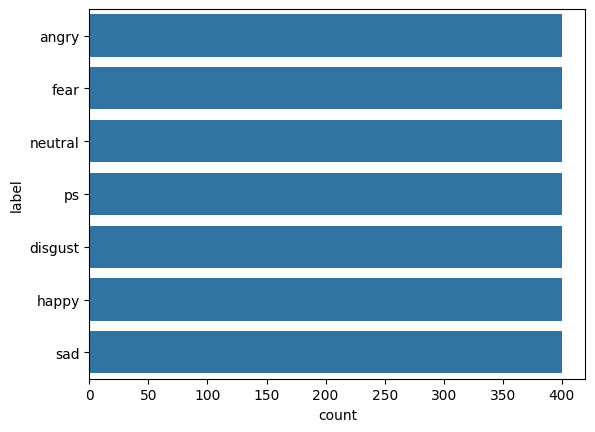

In [36]:
sns.countplot(df['label'])

In [41]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

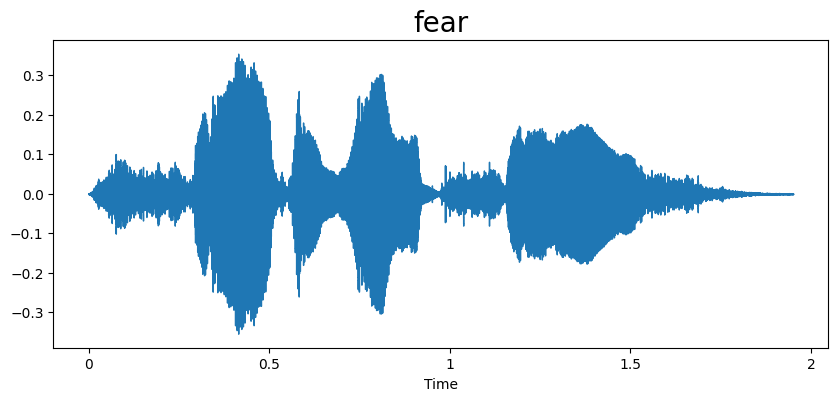

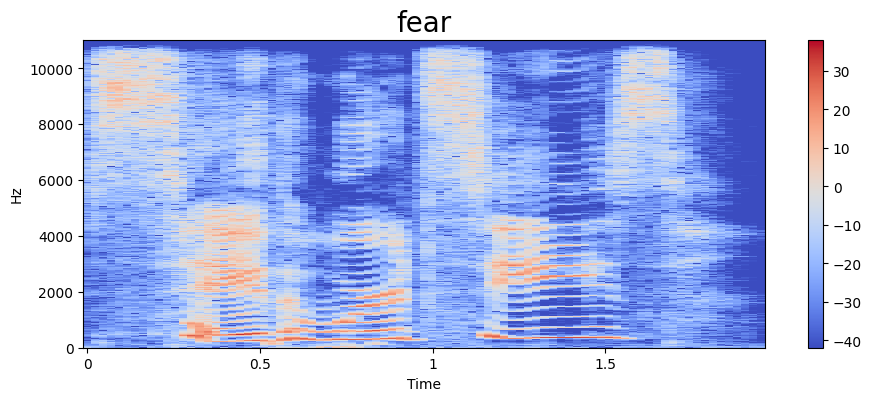

In [46]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

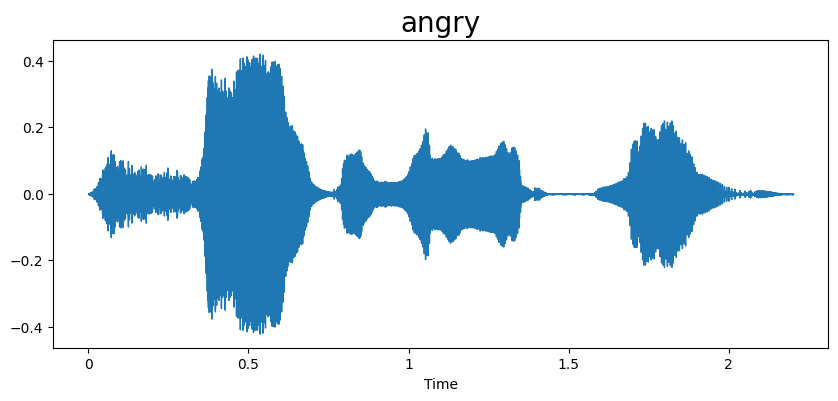

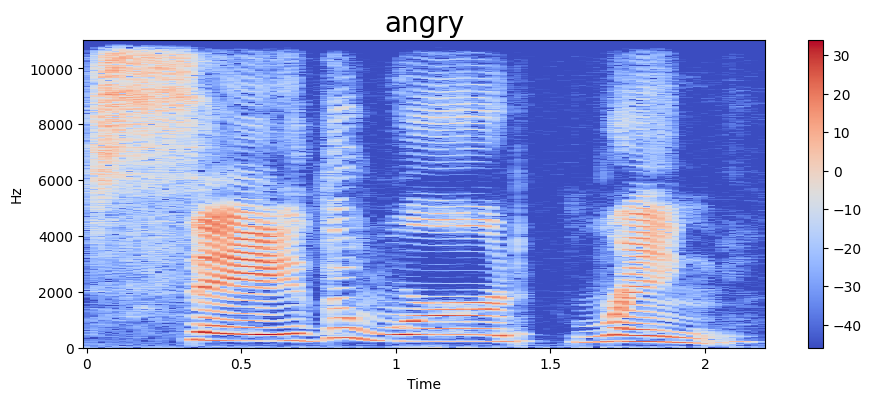

In [47]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

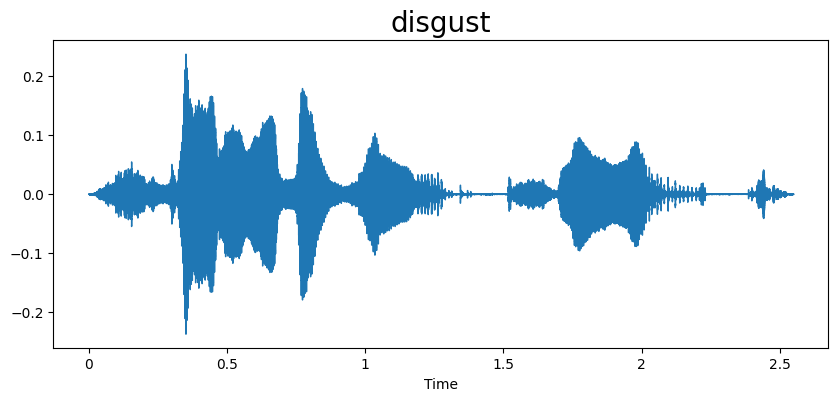

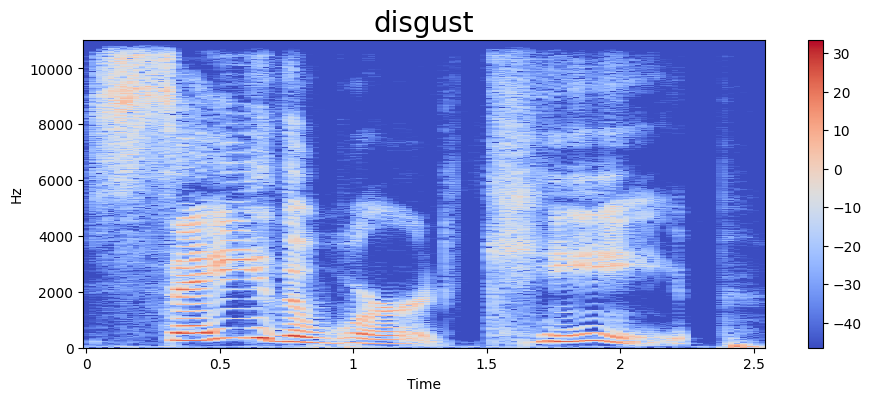

In [48]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

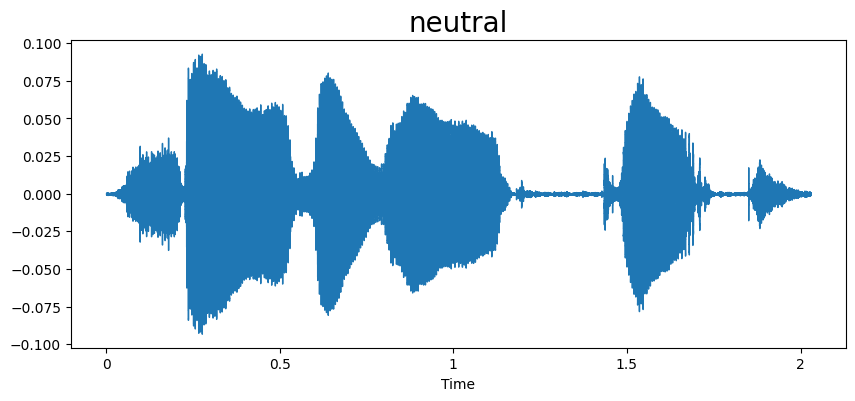

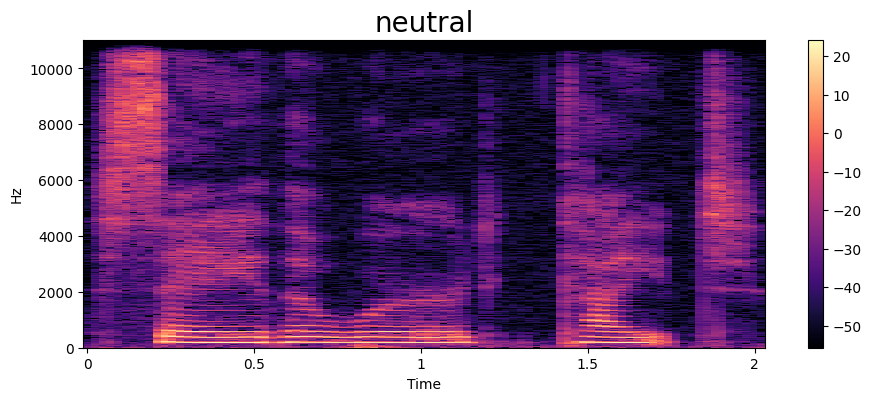

In [49]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

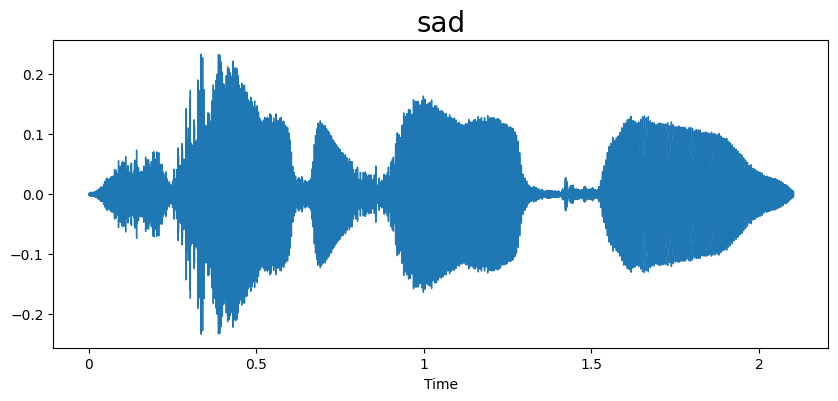

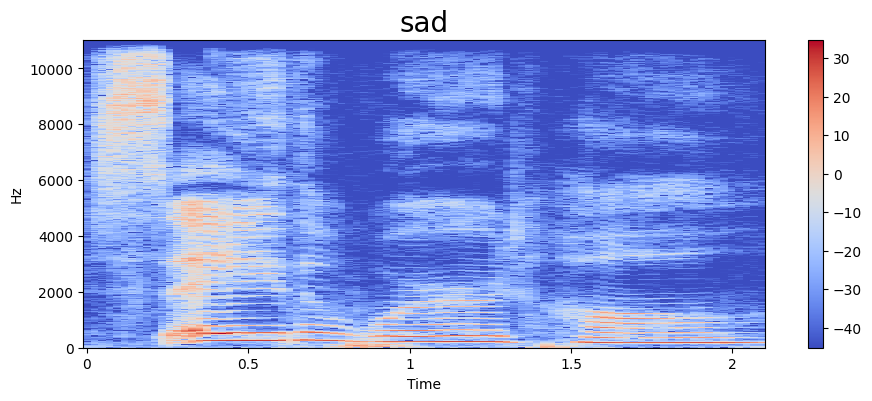

In [50]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

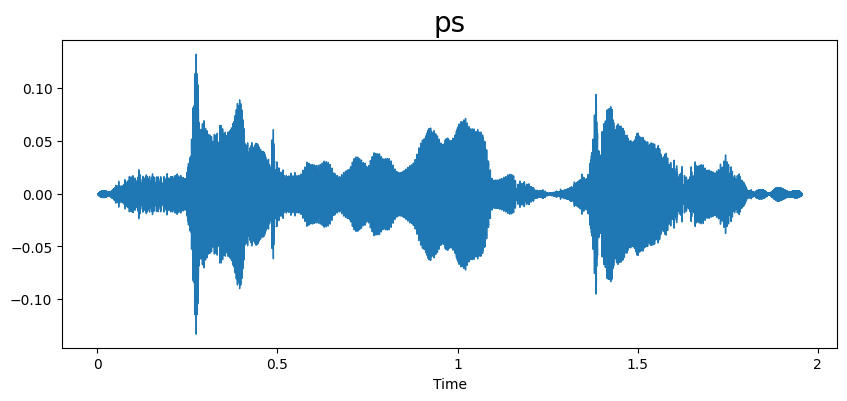

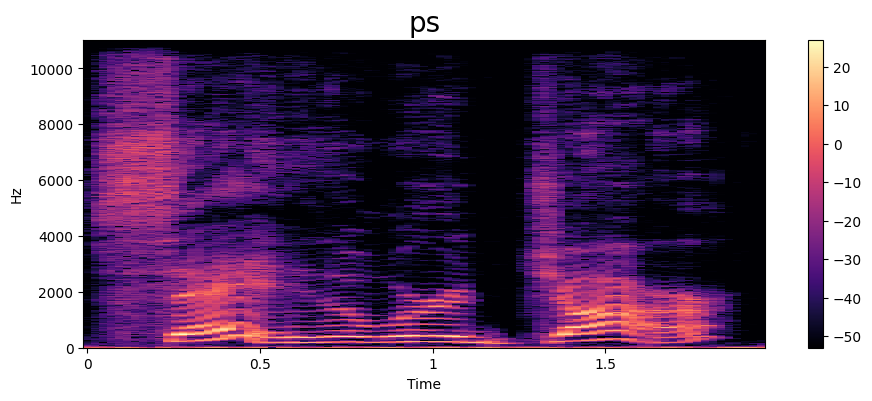

In [51]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

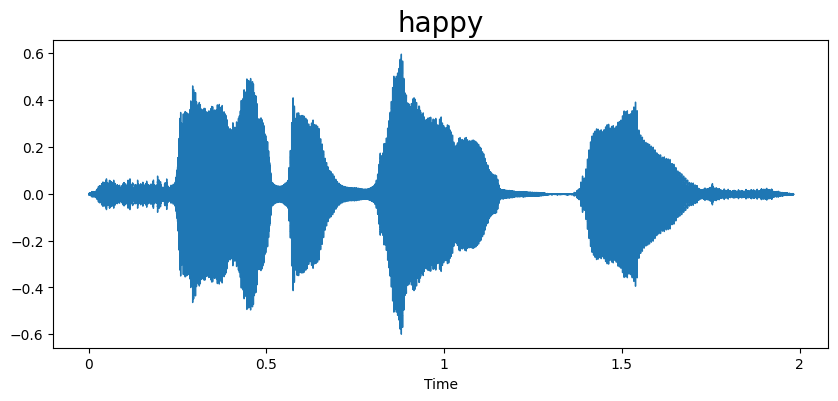

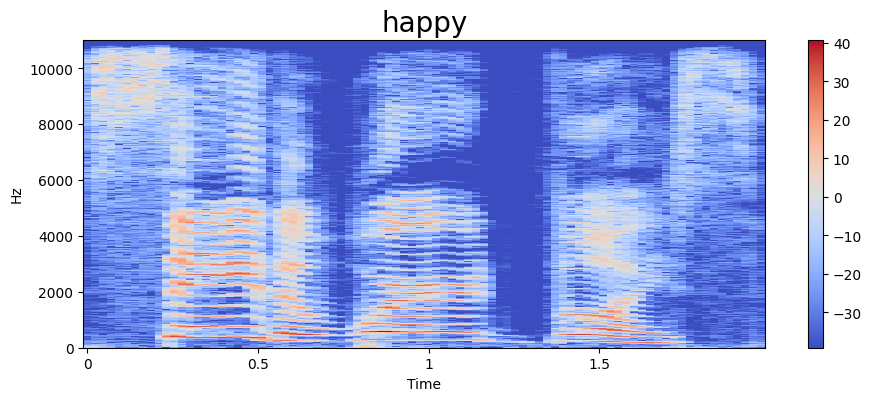

In [52]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


In [53]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [54]:
extract_mfcc(df['speech'][0])

array([-4.0731439e+02,  4.9748074e+01,  5.7831345e+00,  2.3489536e+01,
       -1.6286943e+01,  6.3535156e+00,  5.2845674e+00, -1.3107791e+01,
       -2.1893954e+00, -4.3333354e+00, -1.5758261e+01,  8.2725220e+00,
       -1.0061387e+01,  9.0165834e+00,  2.2428710e+00, -3.9664700e+00,
        1.4915417e+00, -2.3247650e+00, -7.1739087e+00, -5.2895230e-01,
       -5.7433324e+00,  1.4678088e+00, -3.3766797e+00,  1.7851204e+00,
        1.0805033e+00, -1.5917822e+00,  1.0238595e-01,  2.5498478e+00,
        3.2533848e+00,  9.4074154e+00,  8.0459986e+00,  1.1770781e+01,
        8.5951719e+00,  1.1010858e+01,  6.8814301e+00,  8.0331898e+00,
        9.1714853e-01,  9.4907749e-01,  9.0259659e-01,  1.7638899e+00],
      dtype=float32)

In [55]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [56]:
X_mfcc

,speech
0,"[-407.3144, 49.748074, 5.7831345, 23.489536, -..."
1,"[-381.2476, 67.08592, -7.305279, 13.770516, -1..."
2,"[-341.24457, 27.742317, -3.9890747, 13.916147,..."
3,"[-358.21167, 52.57015, 10.084947, 7.305749, -3..."
4,"[-265.49915, 83.28914, 1.4221853, -1.1386955, ..."
...,...
2795,"[-447.49155, 111.03169, 29.136948, 1.6922274, ..."
2796,"[-437.0761, 116.542465, -6.816256, -8.673216, ..."
2797,"[-461.73907, 105.63007, 2.8364568, -5.687767, ..."
2798,"[-492.5041, 82.9032, 20.158035, 14.303089, 21...."


In [57]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [58]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [61]:
y = y.toarray()

In [62]:
y.shape

(2800, 7)

In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.4553 - loss: 1.4765 - val_accuracy: 0.3143 - val_loss: 2.3748
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.8864 - loss: 0.3448 - val_accuracy: 0.4321 - val_loss: 2.6505
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.9584 - loss: 0.1472 - val_accuracy: 0.5054 - val_loss: 2.7557
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9728 - loss: 0.0876 - val_accuracy: 0.3875 - val_loss: 3.6454
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9698 - loss: 0.0782 - val_accuracy: 0.4000 - val_loss: 3.8397
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9747 - loss: 0.0865 - val_accuracy: 0.5464 - val_loss: 2.8254
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9774 - loss: 0.0705 - val_accuracy: 0.5125 - val_loss: 3.2769
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9797 - loss: 0.0692 - val_accuracy:

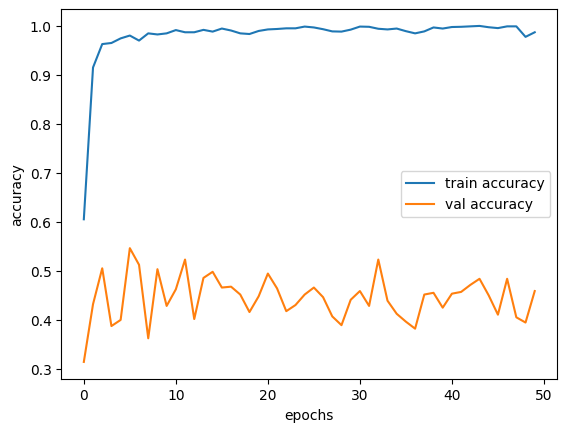

In [65]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

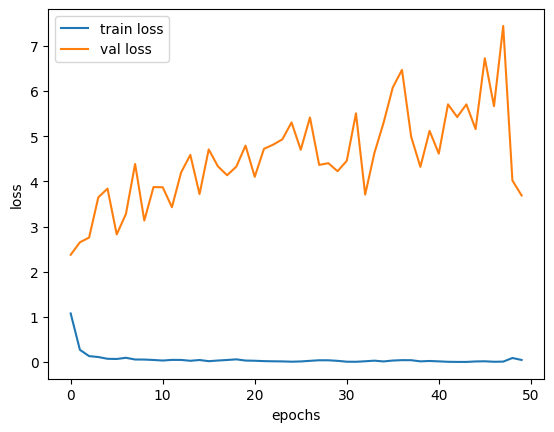

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()